In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_ollama import ChatOllama
# import operator

In [2]:
llm = ChatOllama(model = 'llama3.2')

In [3]:
from langgraph.graph.message import add_messages
#  Define the state

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]


In [4]:
def chat_node(state: ChatState):

    # take user query from state 
    messages = state['messages']

    # send to llm 
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [5]:
graph = StateGraph(ChatState)

# add nodes 
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# compile 
chatbot = graph.compile()

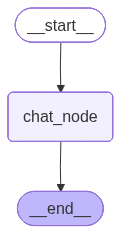

In [6]:
chatbot

In [10]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of India')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is New Delhi.'

In [9]:
while True:

    user_message = input('Type here: ')

    print('User: ', user_message)
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]})
    print('AI: ', response['messages'][-1].content)

User:  
AI:  It looks like you didn't ask a question. What would you like to know or discuss? I can help with a wide range of topics, from science and history to entertainment and culture.
User:  
AI:  I'm happy to chat with you. Is there something on your mind that you'd like to talk about, or are you looking for recommendations on a particular topic? I can offer information and insights on a wide range of subjects.
User:  exit
